In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [416]:
df = pd.read_csv('C:\\Users\\navee\\Documents\\data.csv')
df.head()

,TRADE ID,SOURCE_SYSTEM,TRADE_DATE,ANOMALY
0,1,A,10-01-2023 9:00 AM,N
1,2,A,11-01-2023 9:15 AM,N
2,3,A,10-01-2023 9:11 AM,N
3,4,A,11-01-2023 9:15 AM,N
4,5,A,17-01-2023 9:30 AM,N


In [417]:
df = df.drop(['ANOMALY'],axis=1)
df['TRADE_DATE'] = pd.to_datetime(df['TRADE_DATE'])
df.head()

,TRADE ID,SOURCE_SYSTEM,TRADE_DATE
0,1,A,2023-10-01 09:00:00
1,2,A,2023-11-01 09:15:00
2,3,A,2023-10-01 09:11:00
3,4,A,2023-11-01 09:15:00
4,5,A,2023-01-17 09:30:00


In [418]:
df['TRADE_YEAR'] = df['TRADE_DATE'].dt.year
df['TRADE_MONTH'] = df['TRADE_DATE'].dt.month
df['TRADE_DAY'] = df['TRADE_DATE'].dt.day
df['TRADE_HOUR'] = df['TRADE_DATE'].dt.hour
df['TRADE_MINUTE'] = df['TRADE_DATE'].dt.minute

In [419]:
df = df.drop(['TRADE ID','SOURCE_SYSTEM','TRADE_DATE','TRADE_MONTH','TRADE_YEAR', 'TRADE_DAY'], axis=1)

In [420]:
df.head()

,TRADE_HOUR,TRADE_MINUTE
0,9,0
1,9,15
2,9,11
3,9,15
4,9,30


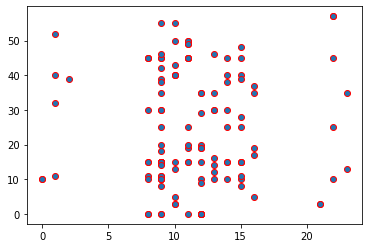

In [421]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],edgecolors = "r")

In [422]:
from sklearn.ensemble import IsolationForest

In [423]:
clf = IsolationForest(contamination=0.12)
clf.fit(df)
predictions = clf.predict(df)

In [424]:
predictions

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1, -1, -1, -1,  1, -1, -1, -1,  1])

In [425]:
import numpy as np
index = np.where(predictions<0)
index

(array([  7,  27,  37,  47,  57,  67,  97, 107, 117, 120, 121, 122, 123,
        125, 126, 127], dtype=int64),)

In [426]:
x=df.values

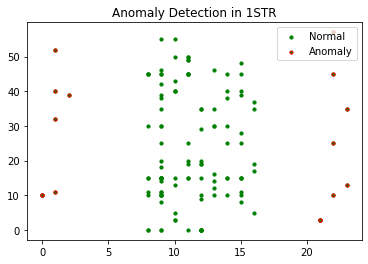

In [427]:
index = np.where(predictions<0)

plt.scatter(df.iloc[:,0],df.iloc[:,1],c='green',
                 s=10,label="Normal")
plt.scatter(x[index,0],x[index,1],c='green',s=10,  edgecolor="red",label="Anomaly")
plt.legend(loc="upper right")
plt.title("Anomaly Detection in 1STR")
plt.show()


KeyError: 'ANOMALY'

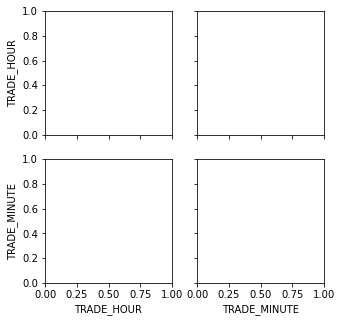

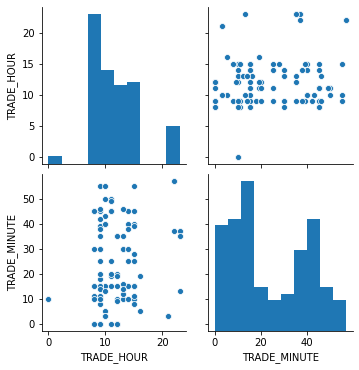

In [160]:
sns.pairplot(df)

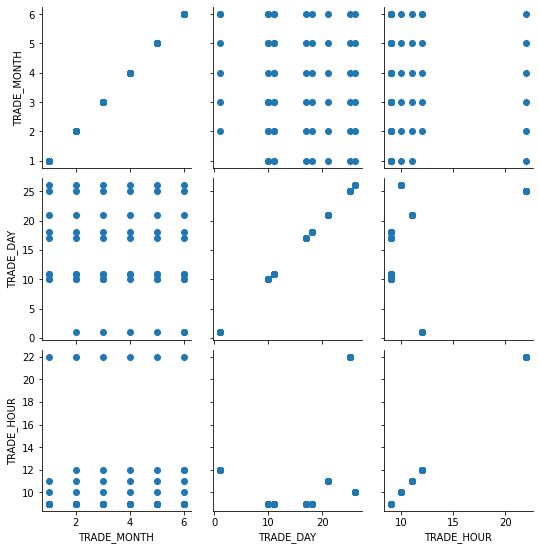

In [147]:
a= sns.PairGrid(df)
a.map(plt.scatter)

C:\Deepthi\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Deepthi\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Deepthi\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Deepthi\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


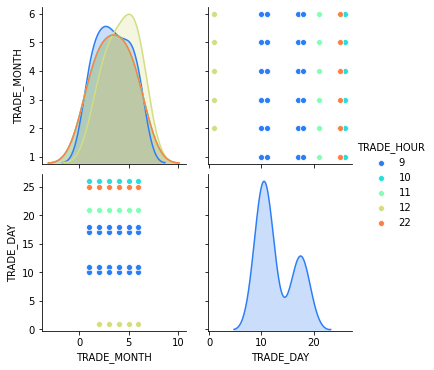

In [151]:
sns.pairplot(df,hue='TRADE_HOUR',palette='rainbow')

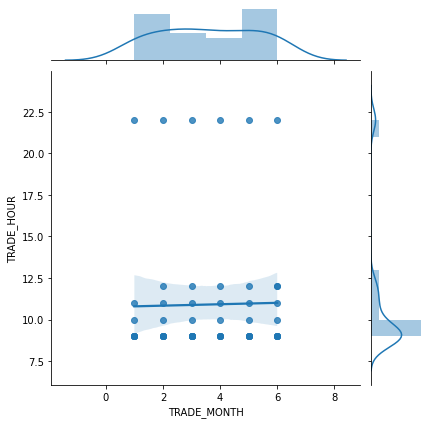

In [152]:
g = sns.JointGrid(x="TRADE_MONTH", y="TRADE_HOUR", data=df)
g = g.plot(sns.regplot, sns.distplot)

KeyError: "['TRADE_MONTH'] not in index"

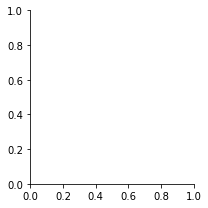

In [161]:
g = sns.FacetGrid(df,hue='TRADE_HOUR')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "TRADE_MONTH", "TRADE_HOUR").add_legend()